In [1]:
# !pip install emoji --upgrade
# !pip install TextBlob
# !pip install autocorrect
# !pip install pyspellchecker
# !pip install tweet-preprocessor
# !pip install transformers
# !pip3 install torch torchvision
# !pip install xformers
# !pip install pattern
# !pip install pandas
# !pip install nltk
# !pip install numpy
# !pip install string
# !pip install emoji
# !pip install textblob
# !pip install wordcloud
# !pip install matplotlib

In [2]:
# Required packages
import pandas as pd                      # Import the pandas library for data manipulation and analysis
import nltk                              # Import the Natural Language Toolkit library
import string                            # Import the string module for string operations
from nltk.tokenize import word_tokenize  # Import the word_tokenize function from NLTK for tokenization
from nltk.probability import FreqDist    # Import the FreqDist class from NLTK for frequency distribution
import numpy as np                       # Import the numpy library for numerical operations
import emoji                             # Import the emoji library for working with emojis
from textblob import TextBlob            # Import the TextBlob library for text processing
from wordcloud import WordCloud, STOPWORDS  # Import the WordCloud class from wordcloud library for generating word clouds
from nltk.corpus import stopwords        # Import the stopwords corpus from NLTK for removing common words
import preprocessor as p                 # Import the preprocessor library for text preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Import the SentimentIntensityAnalyzer class from NLTK for sentiment analysis
from nltk.sentiment.util import *        # Import utility functions for sentiment analysis from NLTK
import matplotlib.pyplot as plt          # Import the matplotlib library for data visualization
from pattern.en import sentiment         # Import sentiment analysis from pattern.en library

# Import classes and functions from the transformers library for natural language processing tasks using pre-trained models
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load a pre-trained BERT-based sentiment analysis model and tokenizer using Hugging Face's transformers library
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Set options for displaying pandas dataframes
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

# Download NLTK data
nltk.download('punkt')      # Download the required NLTK data for tokenization
nltk.download('stopwords')  # Download the required NLTK data for stopwords
nltk.download('vader_lexicon') # Download the VADER lexicon for sentiment analysis

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Load the data
df = pd.read_csv("chatgpt-tweets-data-20230310-20230322.csv")

In [4]:
# Understanding data

# Print the count of columns in the DataFrame
print('Count of columns in the data is:  ', len(df.columns))

# Print the count of rows in the DataFrame
print('Count of rows in the data is:  ', len(df))

# Print information about the dataset
print("Information about the dataset: \n")
df.info()

# Print a summary of numeric fields in the dataset
print("Summary on numeric fields about the dataset: \n", df.describe())

# Display the first few rows of the DataFrame
df.head()

# Print the data types of all columns in the DataFrame
print("Data types of all columns: ")
df.dtypes

# Print the number of tweets with null values
print("Number of tweets with null values:", np.sum(df.isnull().any(axis=1)))

# Print the number of duplicates based on the 'ID' column
print("Number of Duplicates Based on ID", len(df['ID']) - len(df['ID'].drop_duplicates()))

Count of columns in the data is:   8
Count of rows in the data is:   98759
Information about the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98759 entries, 0 to 98758
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            98759 non-null  int64 
 1   Date          98759 non-null  object
 2   Username      98759 non-null  object
 3   Tweet         98759 non-null  object
 4   ReplyCount    98759 non-null  int64 
 5   RetweetCount  98759 non-null  int64 
 6   LikeCount     98759 non-null  int64 
 7   QuoteCount    98759 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.0+ MB
Summary on numeric fields about the dataset: 
                             ID  ReplyCount  RetweetCount  LikeCount  \
count               98759.0000  98759.0000    98759.0000 98759.0000   
mean  1637481406058415616.0000      1.3467        1.3948     9.7873   
std       563281176533013.5000     32.8560       35.96

In [5]:
df['Timestamp'] = pd.to_datetime(df['Date'])          # Convert 'Date' column to datetime format and assign to 'Timestamp'
df['Date'] = df['Timestamp'].dt.date                  # Extract date from 'Timestamp' and update 'Date' column
df['Date'] = pd.to_datetime(df['Date'])               # Convert 'Date' column to datetime format
df['Hour'] = df['Timestamp'].dt.hour                  # Extract hour from 'Timestamp' and assign to 'Hour' column
df['Min'] = df['Timestamp'].dt.minute                 # Extract minute from 'Timestamp' and assign to 'Min' column

df['Date'] = pd.to_datetime(df['Date'])               # Convert 'Date' column to datetime format
df['OnlyDate'] = df['Date'].dt.date                   # Extract only the date from 'Date' column
df['OnlyDate'] = pd.to_datetime(df['OnlyDate'])       # Convert 'OnlyDate' column to datetime format
df['OnlyHour'] = df['Date'].dt.hour                   # Extract only the hour from 'Date' column
df['OnlyMin'] = df['Date'].dt.minute                  # Extract only the minute from 'Date' column
df.head()                                             # Display the first few rows of the DataFrame

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,Timestamp,Hour,Min,OnlyDate,OnlyHour,OnlyMin
0,1638329623946878976,2023-03-21,lqgds36373,ChatGPT is another woke machine.,4,4,32,0,2023-03-21 23:59:55+00:00,23,59,2023-03-21,0,0
1,1638329621581275136,2023-03-21,yxwec12342,"of the Atlantic, or only near the Atla #推特账号 more to me than the greenness or th",0,0,0,0,2023-03-21 23:59:55+00:00,23,59,2023-03-21,0,0
2,1638329600471171074,2023-03-21,cwsea23772,This thread is saved to your Notion database.\n\nTags: [Chatgpt],0,0,0,0,2023-03-21 23:59:50+00:00,23,59,2023-03-21,0,0
3,1638329587133194240,2023-03-21,jerje51666,Prompt AI – ChatGPT #0018,1,0,0,0,2023-03-21 23:59:46+00:00,23,59,2023-03-21,0,0
4,1638329567759802368,2023-03-21,wwxly15746,Just had some interesting conversations with Google's Bard. It appears more confident in its replies compared to ChatGPT. Early days though. Shape of things to come? Yes.,1,0,0,0,2023-03-21 23:59:42+00:00,23,59,2023-03-21,0,0


In [6]:
# Removing Emojis :  After scanning through the data, the emojis didn't seem to be providing much context

print("Number of input records before cleaning: ", df.shape[0])  # Print the number of input records before cleaning

df['Tweet'] = df['Tweet'].apply(lambda s: emoji.replace_emoji(s, ''))  # Apply emoji replacement to remove emojis from 'Tweet' column

df = df[df.Tweet.map(lambda x: x.isascii())]  # Filter the DataFrame to include only records with ASCII characters in 'Tweet' column

print("Number of input records after cleaning: ", df.shape[0])  # Print the number of input records after cleaning

df.head()  # Display the first few rows of the cleaned DataFrame

Number of input records before cleaning:  98759
Number of input records after cleaning:  79213


,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,Timestamp,Hour,Min,OnlyDate,OnlyHour,OnlyMin
0,1638329623946878976,2023-03-21,lqgds36373,ChatGPT is another woke machine.,4,4,32,0,2023-03-21 23:59:55+00:00,23,59,2023-03-21,0,0
2,1638329600471171074,2023-03-21,cwsea23772,This thread is saved to your Notion database.\n\nTags: [Chatgpt],0,0,0,0,2023-03-21 23:59:50+00:00,23,59,2023-03-21,0,0
4,1638329567759802368,2023-03-21,wwxly15746,Just had some interesting conversations with Google's Bard. It appears more confident in its replies compared to ChatGPT. Early days though. Shape of things to come? Yes.,1,0,0,0,2023-03-21 23:59:42+00:00,23,59,2023-03-21,0,0
5,1638329564312264704,2023-03-21,xfcfc69355,"Copilot has actually been useful for me though, it routinely writes chunks of code for me that require little to no modification. I haven't figured out how to leverage ChatGPT effectively yet.",0,0,2,0,2023-03-21 23:59:41+00:00,23,59,2023-03-21,0,0
6,1638329556074475521,2023-03-21,cjxpg99081,i had chatgpt analyze my ocs after askin a bunch of questions and it was really fun in the moment but i literally have nothing i can do with all these answers besides think about them bc who wants to hear character analysis on characters you cant even see,2,0,0,0,2023-03-21 23:59:39+00:00,23,59,2023-03-21,0,0


In [7]:
def get_top_words(df, column_name, top_n):
    """
    Get the top n most common words from a specific column in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to extract the words from.
        top_n (int): The number of top words to return.

    Returns:
        list: A list of tuples representing the most common words and their frequencies.
    """
    tweets = df[column_name].astype(str).tolist()  # Get the list of tweets from the specified column

    words = []  # Initialize an empty list to store the words
    for tweet in tweets:
        words += word_tokenize(tweet.lower())  # Convert to lowercase and tokenize the tweet

    freq_dist = FreqDist(words)  # Calculate the frequency distribution of words

    return freq_dist.most_common(top_n)  # Return the top n most common words

get_top_words(df, "Tweet", 20)  # Call the get_top_words function with the DataFrame, column name, and top n value

[('#', 83960),
 ('chatgpt', 71668),
 ('.', 62848),
 (',', 49861),
 ('the', 49028),
 ('to', 48538),
 ('a', 32795),
 ('and', 32380),
 ('is', 27753),
 ('it', 27557),
 ('i', 27477),
 ('of', 24398),
 ('for', 19422),
 ('you', 17593),
 ('in', 17352),
 ('ai', 17260),
 ('?', 15979),
 (':', 14951),
 ('with', 14272),
 ('that', 13775)]

In [8]:
print(df.shape[0])  # Print the number of rows in the DataFrame

df['Original_Tweet'] = df['Tweet']  # Create a new column 'Original_Tweet' and assign the values from the 'Tweet' column to it

79213


In [9]:
def preprocess_tweet(row):
    """
    Preprocesses a tweet by cleaning it using a text preprocessor.

    Args:
        row (pd.Series): A row from a DataFrame containing the tweet.

    Returns:
        str: The cleaned tweet.
    """
    text = row['Tweet']  # Retrieve the value of the 'Tweet' column from the input row
    text = p.clean(text)  # Apply text cleaning using a preprocessor library
    return text  # Return the cleaned tweet

df['Clean_Tweet'] = df.apply(preprocess_tweet, axis=1)  # Apply the 'preprocess_tweet' function to each row of the DataFrame


In [10]:
####### Data Preprocessing - Phase 1
def preprocess_phase1(df):
    """
    Performs Phase 1 of tweet preprocessing on a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.

    Returns:
        pd.DataFrame: The preprocessed DataFrame.
    """
    # convert lowercase column use str.lower()
    df['Clean_Tweet'] = df['Clean_Tweet'].str.lower()

    # remove punctuation marks
    df["Clean_Tweet"] = df.Clean_Tweet.str.replace(r'[^\w\s]', "", regex=True)
    # df['Clean_Tweet'] = df['Clean_Tweet'].str.replace('[^\w\s]', '')
    # df['Clean_Tweet'] = df['Clean_Tweet'].str.replace('[{}]'.format(string.punctuation), '')

    # Replace 2+ dots with space
    df["Clean_Tweet"] = df.Clean_Tweet.str.replace("\.{2,}", " ", regex=True)

    # Replace multiple spaces with a single space
    df["Clean_Tweet"] = df.Clean_Tweet.str.replace("\s+", " ", regex=True)

    # Remove any words which start with &, @
    df["Clean_Tweet"] = df.Clean_Tweet.str.replace("&\w+;", "", regex=True)
    df["Clean_Tweet"] = df.Clean_Tweet.str.replace("@\w+", "", regex=True)

    # Remove # from the hash tags
    df['Clean_Tweet'] = df['Clean_Tweet'].str.replace('#', '')

    # Remove characters that are repeated more than twice
    df["Clean_Tweet"] = df.Clean_Tweet.str.replace(r'(\w)\1{2,}', r'\1\1', regex=True)

    # Correct the english words - not required; words like chatgpt were modified.
    #df["Tweet"] = df["Tweet"].apply(lambda x: str(TextBlob(x).correct()))

    # Remove stop words
    stop = stopwords.words('english')
    df['Clean_Tweet'] = df['Clean_Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

    return(df)

In [11]:
df_part_1 = df[:25000]                            # Select the first 25000 rows of the DataFrame as df_part_1
df_part_2 = df[25000:50000]                       # Select the rows from index 25000 to 49999 as df_part_2
df_part_3 = df[50000:75000]                       # Select the rows from index 50000 to 74999 as df_part_3
df_part_4 = df[75000:]                            # Select the rows from index 75000 onwards as df_part_4

df_part_1_preprocess_phase1 = preprocess_phase1(df_part_1)  # Apply preprocess_phase1 to df_part_1
df_part_2_preprocess_phase1 = preprocess_phase1(df_part_2)  # Apply preprocess_phase1 to df_part_2
df_part_3_preprocess_phase1 = preprocess_phase1(df_part_3)  # Apply preprocess_phase1 to df_part_3
df_part_4_preprocess_phase1 = preprocess_phase1(df_part_4)  # Apply preprocess_phase1 to df_part_4


In [12]:
# Concatenate the preprocessed DataFrames vertically to create the final DataFrame
final_df = pd.concat([df_part_1_preprocess_phase1, df_part_2_preprocess_phase1, df_part_3_preprocess_phase1, df_part_4_preprocess_phase1], axis=0)
# Display the first 20 rows of the final DataFrame
final_df.head(20)

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,Timestamp,Hour,Min,OnlyDate,OnlyHour,OnlyMin,Original_Tweet,Clean_Tweet
0,1638329623946878976,2023-03-21,lqgds36373,ChatGPT is another woke machine.,4,4,32,0,2023-03-21 23:59:55+00:00,23,59,2023-03-21,0,0,ChatGPT is another woke machine.,chatgpt another woke machine
2,1638329600471171074,2023-03-21,cwsea23772,This thread is saved to your Notion database.\n\nTags: [Chatgpt],0,0,0,0,2023-03-21 23:59:50+00:00,23,59,2023-03-21,0,0,This thread is saved to your Notion database.\n\nTags: [Chatgpt],thread saved notion databasetags chatgpt
4,1638329567759802368,2023-03-21,wwxly15746,Just had some interesting conversations with Google's Bard. It appears more confident in its replies compared to ChatGPT. Early days though. Shape of things to come? Yes.,1,0,0,0,2023-03-21 23:59:42+00:00,23,59,2023-03-21,0,0,Just had some interesting conversations with Google's Bard. It appears more confident in its replies compared to ChatGPT. Early days though. Shape of things to come? Yes.,interesting conversations googles bard appears confident replies compared chatgpt early days though shape things come yes
5,1638329564312264704,2023-03-21,xfcfc69355,"Copilot has actually been useful for me though, it routinely writes chunks of code for me that require little to no modification. I haven't figured out how to leverage ChatGPT effectively yet.",0,0,2,0,2023-03-21 23:59:41+00:00,23,59,2023-03-21,0,0,"Copilot has actually been useful for me though, it routinely writes chunks of code for me that require little to no modification. I haven't figured out how to leverage ChatGPT effectively yet.",copilot actually useful though routinely writes chunks code require little modification havent figured leverage chatgpt effectively yet
6,1638329556074475521,2023-03-21,cjxpg99081,i had chatgpt analyze my ocs after askin a bunch of questions and it was really fun in the moment but i literally have nothing i can do with all these answers besides think about them bc who wants to hear character analysis on characters you cant even see,2,0,0,0,2023-03-21 23:59:39+00:00,23,59,2023-03-21,0,0,i had chatgpt analyze my ocs after askin a bunch of questions and it was really fun in the moment but i literally have nothing i can do with all these answers besides think about them bc who wants to hear character analysis on characters you cant even see,chatgpt analyze ocs askin bunch questions really fun moment literally nothing answers besides think bc wants hear character analysis characters cant even see
7,1638329552861556740,2023-03-21,kkcju69991,"You are a smart guy Mark. You should be able to recognize ChatGPT is brought to you by the same MONORAIL! salesmen who sold you Crypto, self driving, and NFTs. The technology is not what they claim it is. You can tell by how the use case is ""writing"" poems abt your pets.",0,0,0,0,2023-03-21 23:59:38+00:00,23,59,2023-03-21,0,0,"You are a smart guy Mark. You should be able to recognize ChatGPT is brought to you by the same MONORAIL! salesmen who sold you Crypto, self driving, and NFTs. The technology is not what they claim it is. You can tell by how the use case is ""writing"" poems abt your pets.",smart guy mark able recognize chatgpt brought monorail salesmen sold crypto self driving nfts technology claim tell use case writing poems abt pets
8,1638329524231233537,2023-03-21,qpbce71884,I was just going to say ask ChatGPT,0,0,1,0,2023-03-21 23:59:31+00:00,23,59,2023-03-21,0,0,I was just going to say ask ChatGPT,going say ask chatgpt
10,1638329482212720643,2023-03-21,ilsfk08081,"I find it really odd that #ChatGPT can return complete garbage to straight forward #mathematics questions \n\nThe calculations are wrong, and they are not Cullen primes!",2,0,0,0,2023-03-21 23:59:21+00:00,23,59,2023-03-21,0,0,"I find it really odd that #ChatGPT can return complete garbage to straight forward #mathematics questions \n\nThe calculations are wrong, and they are not Cullen primes!",f

In [13]:
# Display first 5
final_df.head()

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,Timestamp,Hour,Min,OnlyDate,OnlyHour,OnlyMin,Original_Tweet,Clean_Tweet
0,1638329623946878976,2023-03-21,lqgds36373,ChatGPT is another woke machine.,4,4,32,0,2023-03-21 23:59:55+00:00,23,59,2023-03-21,0,0,ChatGPT is another woke machine.,chatgpt another woke machine
2,1638329600471171074,2023-03-21,cwsea23772,This thread is saved to your Notion database.\n\nTags: [Chatgpt],0,0,0,0,2023-03-21 23:59:50+00:00,23,59,2023-03-21,0,0,This thread is saved to your Notion database.\n\nTags: [Chatgpt],thread saved notion databasetags chatgpt
4,1638329567759802368,2023-03-21,wwxly15746,Just had some interesting conversations with Google's Bard. It appears more confident in its replies compared to ChatGPT. Early days though. Shape of things to come? Yes.,1,0,0,0,2023-03-21 23:59:42+00:00,23,59,2023-03-21,0,0,Just had some interesting conversations with Google's Bard. It appears more confident in its replies compared to ChatGPT. Early days though. Shape of things to come? Yes.,interesting conversations googles bard appears confident replies compared chatgpt early days though shape things come yes
5,1638329564312264704,2023-03-21,xfcfc69355,"Copilot has actually been useful for me though, it routinely writes chunks of code for me that require little to no modification. I haven't figured out how to leverage ChatGPT effectively yet.",0,0,2,0,2023-03-21 23:59:41+00:00,23,59,2023-03-21,0,0,"Copilot has actually been useful for me though, it routinely writes chunks of code for me that require little to no modification. I haven't figured out how to leverage ChatGPT effectively yet.",copilot actually useful though routinely writes chunks code require little modification havent figured leverage chatgpt effectively yet
6,1638329556074475521,2023-03-21,cjxpg99081,i had chatgpt analyze my ocs after askin a bunch of questions and it was really fun in the moment but i literally have nothing i can do with all these answers besides think about them bc who wants to hear character analysis on characters you cant even see,2,0,0,0,2023-03-21 23:59:39+00:00,23,59,2023-03-21,0,0,i had chatgpt analyze my ocs after askin a bunch of questions and it was really fun in the moment but i literally have nothing i can do with all these answers besides think about them bc who wants to hear character analysis on characters you cant even see,chatgpt analyze ocs askin bunch questions really fun moment literally nothing answers besides think bc wants hear character analysis characters cant even see


In [14]:
SIA = SentimentIntensityAnalyzer()
final_df["Clean_Tweet"]= final_df["Clean_Tweet"].astype(str)

# Applying Model, Variable Creation
final_df['Polarity_Score']=final_df["Clean_Tweet"].apply(lambda x:SIA.polarity_scores(x)['compound'])
final_df['Neutral_Score']=final_df["Clean_Tweet"].apply(lambda x:SIA.polarity_scores(x)['neu'])
final_df['Negative_Score']=final_df["Clean_Tweet"].apply(lambda x:SIA.polarity_scores(x)['neg'])
final_df['Positive_Score']=final_df["Clean_Tweet"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
final_df['Sentiment']=''
final_df.loc[final_df['Polarity_Score']>0,'Sentiment']='Positive'
final_df.loc[final_df['Polarity_Score']==0,'Sentiment']='Neutral'
final_df.loc[final_df['Polarity_Score']<0,'Sentiment']='Negative'
final_df[:5]

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,Timestamp,Hour,...,OnlyDate,OnlyHour,OnlyMin,Original_Tweet,Clean_Tweet,Polarity_Score,Neutral_Score,Negative_Score,Positive_Score,Sentiment
0,1638329623946878976,2023-03-21,lqgds36373,ChatGPT is another woke machine.,4,4,32,0,2023-03-21 23:59:55+00:00,23,...,2023-03-21,0,0,ChatGPT is another woke machine.,chatgpt another woke machine,0.0000,1.0000,0.0000,0.0000,Neutral
2,1638329600471171074,2023-03-21,cwsea23772,This thread is saved to your Notion database.\n\nTags: [Chatgpt],0,0,0,0,2023-03-21 23:59:50+00:00,23,...,2023-03-21,0,0,This thread is saved to your Notion database.\n\nTags: [Chatgpt],thread saved notion databasetags chatgpt,0.4215,0.5880,0.0000,0.4120,Positive
4,1638329567759802368,2023-03-21,wwxly15746,Just had some interesting conversations with Google's Bard. It appears more confident in its replies compared to ChatGPT. Early days though. Shape of things to come? Yes.,1,0,0,0,2023-03-21 23:59:42+00:00,23,...,2023-03-21,0,0,Just had some interesting conversations with Google's Bard. It appears more confident in its replies compared to ChatGPT. Early days though. Shape of things to come? Yes.,interesting conversations googles bard appears confident replies compared chatgpt early days though shape things come yes,0.8225,0.6020,0.0000,0.3980,Positive
5,1638329564312264704,2023-03-21,xfcfc69355,"Copilot has actually been useful for me though, it routinely writes chunks of code for me that require little to no modification. I haven't figured out how to leverage ChatGPT effectively yet.",0,0,2,0,2023-03-21 23:59:41+00:00,23,...,2023-03-21,0,0,"Copilot has actually been useful for me though, it routinely writes chunks of code for me that require little to no modification. I haven't figured out how to leverage ChatGPT effectively yet.",copilot actually useful though routinely writes chunks code require little modification havent figured leverage chatgpt effectively yet,0.7003,0.7210,0.0000,0.2790,Positive
6,1638329556074475521,2023-03-21,cjxpg99081,i had chatgpt analyze my ocs after askin a bunch of questions and it was really fun in the moment but i literally have nothing i can do with all these answers besides think about them bc who wants to hear character analysis on characters you cant even see,2,0,0,0,2023-03-21 23:59:39+00:00,23,...,2023-03-21,0,0,i had chatgpt analyze my ocs after askin a bunch of questions and it was really fun in the moment but i literally have nothing i can do with all these answers besides think about them bc who wants to hear character analysis on characters you cant even see,chatgpt analyze ocs askin bunch questions really fun moment literally nothing answers besides think bc wants hear character analysis characters cant even see,0.5563,0.8600,0.0000,0.1400,Positive


In [15]:
final_df[(final_df.Sentiment == "Negative")].head()

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,Timestamp,Hour,...,OnlyDate,OnlyHour,OnlyMin,Original_Tweet,Clean_Tweet,Polarity_Score,Neutral_Score,Negative_Score,Positive_Score,Sentiment
10,1638329482212720643,2023-03-21,ilsfk08081,"I find it really odd that #ChatGPT can return complete garbage to straight forward #mathematics questions \n\nThe calculations are wrong, and they are not Cullen primes!",2,0,0,0,2023-03-21 23:59:21+00:00,23,...,2023-03-21,0,0,"I find it really odd that #ChatGPT can return complete garbage to straight forward #mathematics questions \n\nThe calculations are wrong, and they are not Cullen primes!",find really odd return complete garbage straight forward questions calculations wrong cullen primes,-0.5849,0.5680,0.3240,0.1080,Negative
19,1638329336829984768,2023-03-21,ibjwq58890,Finally tried ChatGPT. I was disappointed in how unconvincing it was on LORs.,1,0,0,0,2023-03-21 23:58:47+00:00,23,...,2023-03-21,0,0,Finally tried ChatGPT. I was disappointed in how unconvincing it was on LORs.,finally tried chatgpt disappointed unconvincing lors,-0.4767,0.6170,0.3830,0.0000,Negative
30,1638329138334318597,2023-03-21,bzezb64288,"man, the way they're sanitizing #ChatGPT info/responses is bizarre",1,0,0,0,2023-03-21 23:57:59+00:00,23,...,2023-03-21,0,0,"man, the way they're sanitizing #ChatGPT info/responses is bizarre",man way theyre sanitizing inforesponses bizarre,-0.3182,0.6850,0.3150,0.0000,Negative
34,1638329069270958086,2023-03-21,riigq05184,"Even Chat GPT calling The Democrat's, Joe Biden and \nDA Alvin Bragg, Morons at this point. ""Damage to U S. Economy and Decline in U S. International Reputation"". Failed to mention President Trump's secret service accommodations. \nNYPD = Failure ! \n#TrumpIndictments",0,0,2,0,2023-03-21 23:57:43+00:00,23,...,2023-03-21,0,0,"Even Chat GPT calling The Democrat's, Joe Biden and \nDA Alvin Bragg, Morons at this point. ""Damage to U S. Economy and Decline in U S. International Reputation"". Failed to mention President Trump's secret service accommodations. \nNYPD = Failure ! \n#TrumpIndictments",even chat gpt calling democrats joe biden da alvin bragg morons point damage u economy decline u international reputation failed mention president trumps secret service accommodations nypd failure,-0.9022,0.6450,0.3550,0.0000,Negative
36,1638329036236636160,2023-03-21,hsuxb65785,"Unlock the treasure trove! Keep these invaluable tips and tricks at your fingertips! \n\n Don't miss out, SAVE for later!\n\n#InstagramStrategy #InstagramSuccess #SocialMediaMarketingTips\n#GraphicDesignExperts #ChatGPT #AIpoweredDesign\n#DesignResources #AItools #MarketingHacks",1,0,0,0,2023-03-21 23:57:35+00:00,23,...,2023-03-21,0,0,"Unlock the treasure trove! Keep these invaluable tips and tricks at your fingertips! \n\n Don't miss out, SAVE for later!\n\n#InstagramStrategy #InstagramSuccess #SocialMediaMarketingTips\n#GraphicDesignExperts #ChatGPT #AIpoweredDesign\n#DesignResources #AItools #MarketingHacks",unlock treasure trove keep invaluable tips tricks fingertips dont miss save later,-0.1240,0.5070,0.2620,0.2310,Negative


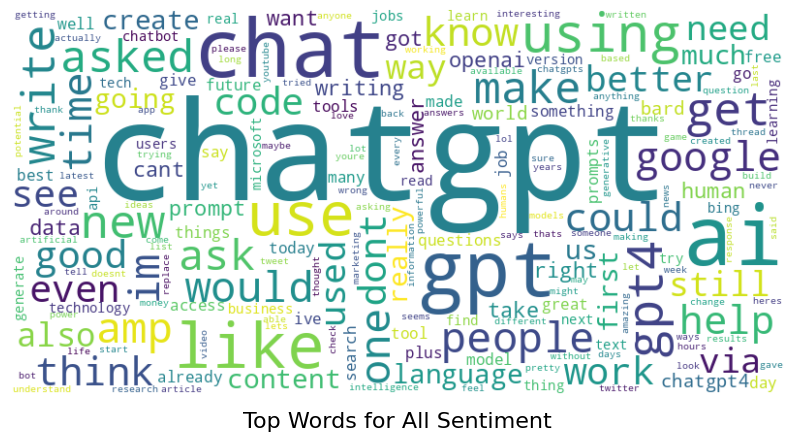

In [16]:
def wordcloudplot(df, col, nos, title):
    """
    Generate and display a word cloud plot based on the top words in a specific column of a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        col (str): The name of the column to extract the words from.
        nos (int): The number of top words to consider.
        title (str): The title of the word cloud plot.

    Returns:
        None
    """
    top_words = get_top_words(df, col, nos)  # Get the top words using the get_top_words function

    wordcloud = WordCloud(width=800,
                          height=400,
                          contour_width=3,
                          contour_color='midnightblue',
                          background_color="white").generate_from_frequencies(dict(top_words))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16, pad=20, y=-0.15)  # Adjust the title position and text size
    plt.show()

df_positive = final_df[final_df["Sentiment"] == "Positive"]
df_neutral = final_df[final_df["Sentiment"] == "Neutral"]
df_negative = final_df[final_df["Sentiment"] == "Negative"]

wordcloudplot(final_df, "Clean_Tweet", 500, "Top Words for All Sentiment")


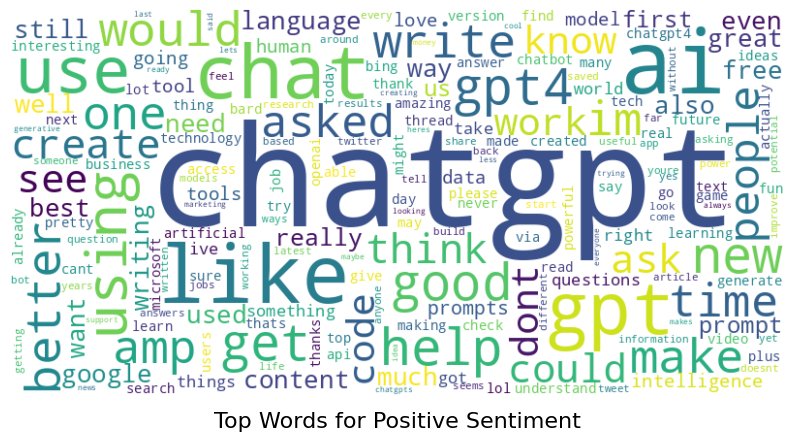

In [17]:
wordcloudplot(df_positive, "Clean_Tweet", 500, "Top Words for Positive Sentiment")

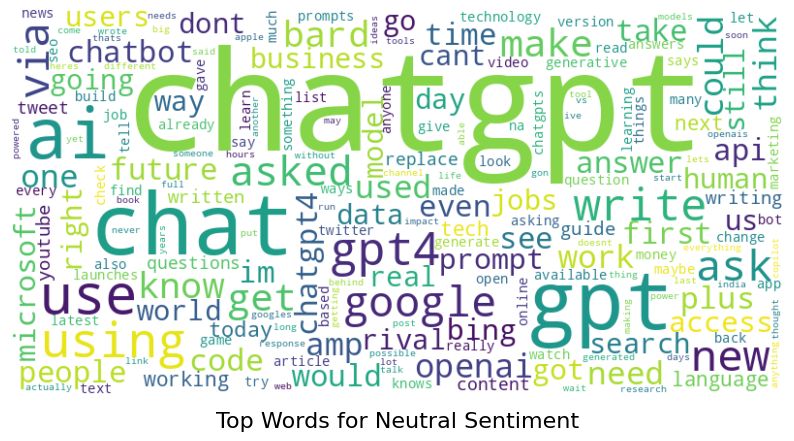

In [18]:
wordcloudplot(df_neutral, "Clean_Tweet", 500, "Top Words for Neutral Sentiment")

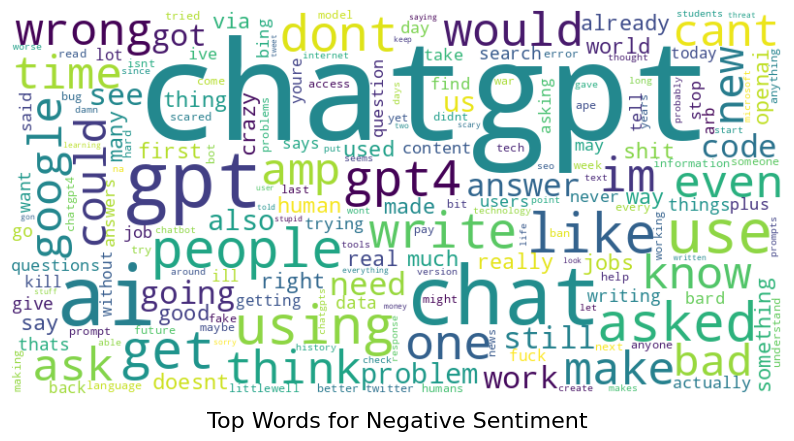

In [19]:
wordcloudplot(df_negative, "Clean_Tweet", 500, "Top Words for Negative Sentiment")

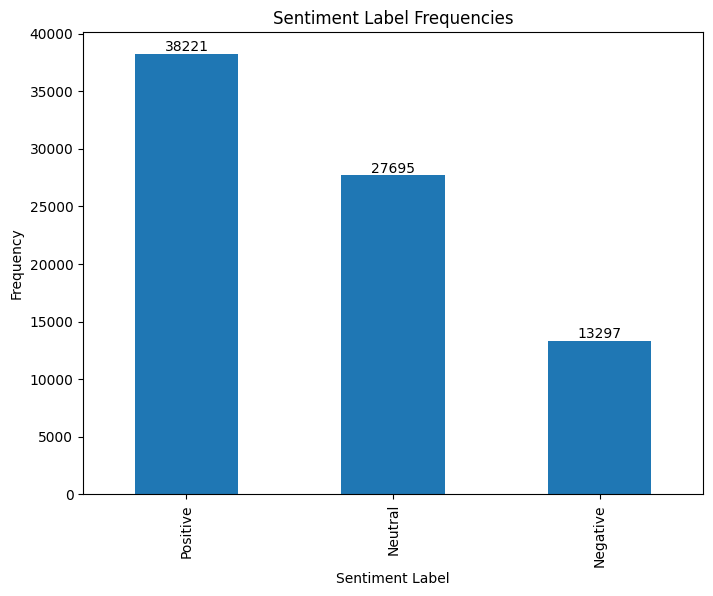

In [20]:
# count the frequency of each sentiment label
Sentiment_counts =final_df.Sentiment.value_counts()

# create a column plot
fig, ax = plt.subplots(figsize=(8,6))
Sentiment_counts.plot(kind='bar', ax=ax)

# set the plot title and axis labels
ax.set_title('Sentiment Label Frequencies')
ax.set_xlabel('Sentiment Label')
ax.set_ylabel('Frequency')

# add data labels to the top of each column
for i, freq in enumerate(Sentiment_counts):
    ax.text(i, freq, str(freq), ha='center', va='bottom')

# display the plot
plt.show()

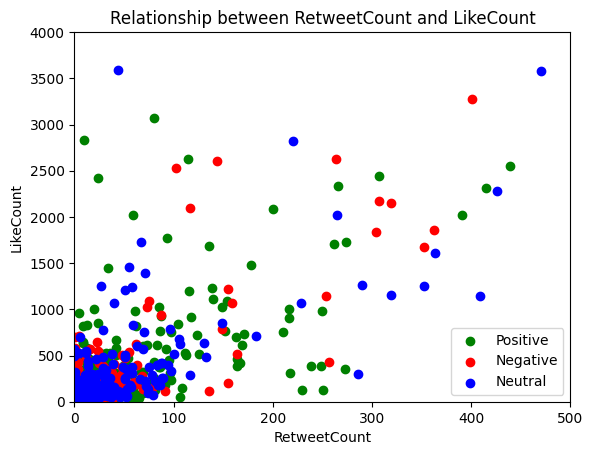

In [21]:
# Scatter plot for showing the relationship between RetweetCount and LikeCount variables, colored by sentiment_label
plt.scatter(final_df[final_df['Sentiment'] == 'Positive']['RetweetCount'],
            final_df[final_df['Sentiment'] == 'Positive']['LikeCount'], c='green', label='Positive')

plt.scatter(final_df[final_df['Sentiment'] == 'Negative']['RetweetCount'],
            final_df[final_df['Sentiment'] == 'Negative']['LikeCount'], c='Red', label='Negative')

plt.scatter(final_df[final_df['Sentiment'] == 'Neutral']['RetweetCount'],
            final_df[final_df['Sentiment'] == 'Neutral']['LikeCount'], c='blue', label='Neutral')

# Set the title, x and y axis labels
plt.title('Relationship between RetweetCount and LikeCount')
plt.xlabel('RetweetCount')
plt.ylabel('LikeCount')

# x and y axis limits
plt.xlim(0, 500)
plt.ylim(0, 4000)


plt.legend()
plt.show()

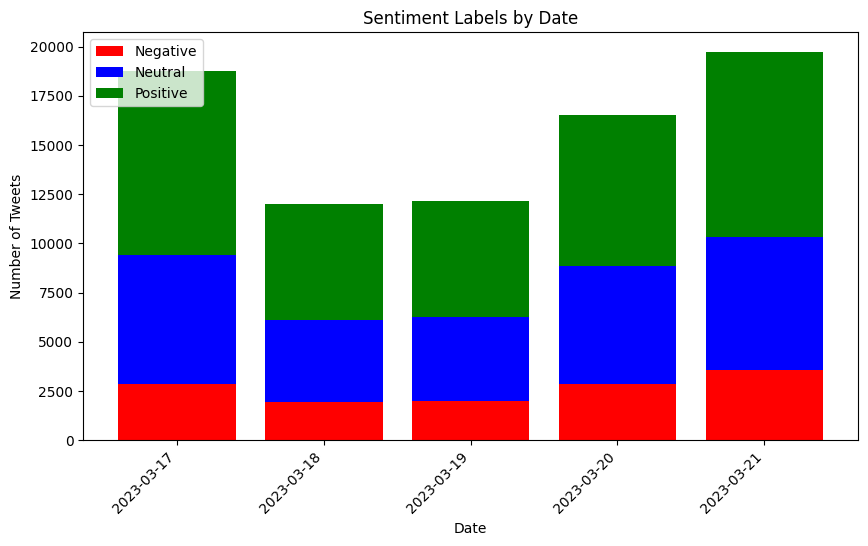

In [22]:
# Distribution of tweets over the days
pivoted_df = pd.pivot_table(final_df[["OnlyDate", "Sentiment"]], index='OnlyDate', columns='Sentiment', aggfunc=len, fill_value=0)

# create bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(pivoted_df.index.values, pivoted_df['Negative'], color='Red', label='Negative')
ax.bar(pivoted_df.index.values, pivoted_df['Neutral'], bottom=pivoted_df['Negative'], color='blue', label='Neutral')
ax.bar(pivoted_df.index.values, pivoted_df['Positive'], bottom=pivoted_df['Neutral']+pivoted_df['Negative'], color='green', label='Positive')

# set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.set_title('Sentiment Labels by Date')

# rotate x-axis labels if needed
fig.autofmt_xdate(rotation=45)

# add legend
ax.legend(loc='upper left')

# show the plot
plt.show()

In [23]:
# Pattern, which is a multipurpose Python library that can handle NLP, data mining, network analysis,
# machine learning, and visualization.
# The Polarity result ranges from highly Positive to highly negative (1 to -1)
# The subjectivity ranges from 0(Objective) to 1(Subjective).

# Applying Model, Variable Creation
final_df['Sentiment_Pattern_Value']=final_df["Clean_Tweet"].apply(lambda x:sentiment(x)[0])
final_df['Sentiment_Pattern_Opinion']=final_df["Clean_Tweet"].apply(lambda x:sentiment(x)[1])

# Converting 0 to 1 Decimal Score to a Categorical Variable
final_df['Sentiment_Pattern_Score']=''
final_df.loc[final_df['Sentiment_Pattern_Value']>0,'Sentiment_Pattern_Score']='Positive'
final_df.loc[final_df['Sentiment_Pattern_Value']==0,'Sentiment_Pattern_Score']='Neutral'
final_df.loc[final_df['Sentiment_Pattern_Value']<0,'Sentiment_Pattern_Score']='Negative'

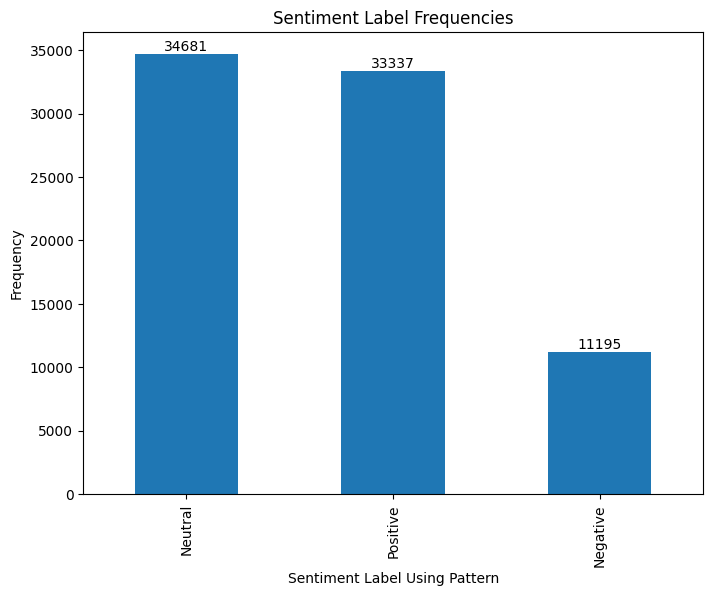

In [24]:
# count the frequency of each sentiment label
Sentiment_counts =final_df.Sentiment_Pattern_Score.value_counts()

# create a column plot
fig, ax = plt.subplots(figsize=(8,6))
Sentiment_counts.plot(kind='bar', ax=ax)

# set the plot title and axis labels
ax.set_title('Sentiment Label Frequencies')
ax.set_xlabel('Sentiment Label Using Pattern')
ax.set_ylabel('Frequency')

# add data labels to the top of each column
for i, freq in enumerate(Sentiment_counts):
    ax.text(i, freq, str(freq), ha='center', va='bottom')

# display the plot
plt.show()

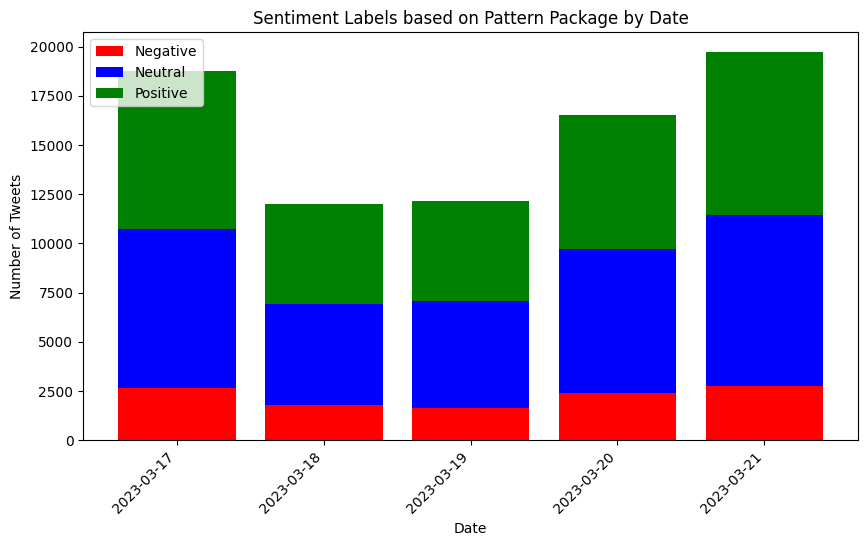

In [25]:
# Distribution of tweets over the days
pivoted_df_pattern = pd.pivot_table(final_df[["OnlyDate", "Sentiment_Pattern_Score"]], index='OnlyDate', columns='Sentiment_Pattern_Score', aggfunc=len, fill_value=0)

# create bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(pivoted_df_pattern.index.values, pivoted_df_pattern['Negative'], color='Red', label='Negative')
ax.bar(pivoted_df_pattern.index.values, pivoted_df_pattern['Neutral'], bottom=pivoted_df_pattern['Negative'], color='blue', label='Neutral')
ax.bar(pivoted_df_pattern.index.values, pivoted_df_pattern['Positive'], bottom=pivoted_df_pattern['Neutral']+pivoted_df_pattern['Negative'], color='green', label='Positive')

# set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.set_title('Sentiment Labels based on Pattern Package by Date')

# rotate x-axis labels if needed
fig.autofmt_xdate(rotation=45)

# add legend
ax.legend(loc='upper left')

# show the plot
plt.show()

In [26]:
final_df.groupby(['Sentiment'])['Sentiment'].count()

Sentiment
Negative    13297
Neutral     27695
Positive    38221
Name: Sentiment, dtype: int64

In [27]:
final_df.groupby(['Sentiment_Pattern_Score'])['Sentiment_Pattern_Score'].count()

Sentiment_Pattern_Score
Negative    11195
Neutral     34681
Positive    33337
Name: Sentiment_Pattern_Score, dtype: int64

In [28]:
matched, un_matched = final_df[final_df['Sentiment']==final_df['Sentiment_Pattern_Score']].shape[0],final_df[final_df['Sentiment']!=final_df['Sentiment_Pattern_Score']].shape[0]
print("Matched = {}\nUnmatched = {}".format(matched,un_matched))

Matched = 51796
Unmatched = 27417


In [29]:
final_df[:5]

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,Timestamp,Hour,...,Original_Tweet,Clean_Tweet,Polarity_Score,Neutral_Score,Negative_Score,Positive_Score,Sentiment,Sentiment_Pattern_Value,Sentiment_Pattern_Opinion,Sentiment_Pattern_Score
0,1638329623946878976,2023-03-21,lqgds36373,ChatGPT is another woke machine.,4,4,32,0,2023-03-21 23:59:55+00:00,23,...,ChatGPT is another woke machine.,chatgpt another woke machine,0.0000,1.0000,0.0000,0.0000,Neutral,0.0000,0.0000,Neutral
2,1638329600471171074,2023-03-21,cwsea23772,This thread is saved to your Notion database.\n\nTags: [Chatgpt],0,0,0,0,2023-03-21 23:59:50+00:00,23,...,This thread is saved to your Notion database.\n\nTags: [Chatgpt],thread saved notion databasetags chatgpt,0.4215,0.5880,0.0000,0.4120,Positive,0.0000,0.0000,Neutral
4,1638329567759802368,2023-03-21,wwxly15746,Just had some interesting conversations with Google's Bard. It appears more confident in its replies compared to ChatGPT. Early days though. Shape of things to come? Yes.,1,0,0,0,2023-03-21 23:59:42+00:00,23,...,Just had some interesting conversations with Google's Bard. It appears more confident in its replies compared to ChatGPT. Early days though. Shape of things to come? Yes.,interesting conversations googles bard appears confident replies compared chatgpt early days though shape things come yes,0.8225,0.6020,0.0000,0.3980,Positive,0.3667,0.5444,Positive
5,1638329564312264704,2023-03-21,xfcfc69355,"Copilot has actually been useful for me though, it routinely writes chunks of code for me that require little to no modification. I haven't figured out how to leverage ChatGPT effectively yet.",0,0,2,0,2023-03-21 23:59:41+00:00,23,...,"Copilot has actually been useful for me though, it routinely writes chunks of code for me that require little to no modification. I haven't figured out how to leverage ChatGPT effectively yet.",copilot actually useful though routinely writes chunks code require little modification havent figured leverage chatgpt effectively yet,0.7003,0.7210,0.0000,0.2790,Positive,0.2375,0.4333,Positive
6,1638329556074475521,2023-03-21,cjxpg99081,i had chatgpt analyze my ocs after askin a bunch of questions and it was really fun in the moment but i literally have nothing i can do with all these answers besides think about them bc who wants to hear character analysis on characters you cant even see,2,0,0,0,2023-03-21 23:59:39+00:00,23,...,i had chatgpt analyze my ocs after askin a bunch of questions and it was really fun in the moment but i literally have nothing i can do with all these answers besides think about them bc who wants to hear character analysis on characters you cant even see,chatgpt analyze ocs askin bunch questions really fun moment literally nothing answers besides think bc wants hear character analysis characters cant even see,0.5563,0.8600,0.0000,0.1400,Positive,0.2500,0.1500,Positive


In [30]:
df_not_matching_sentiments=final_df[final_df['Sentiment']!=final_df['Sentiment_Pattern_Score']]

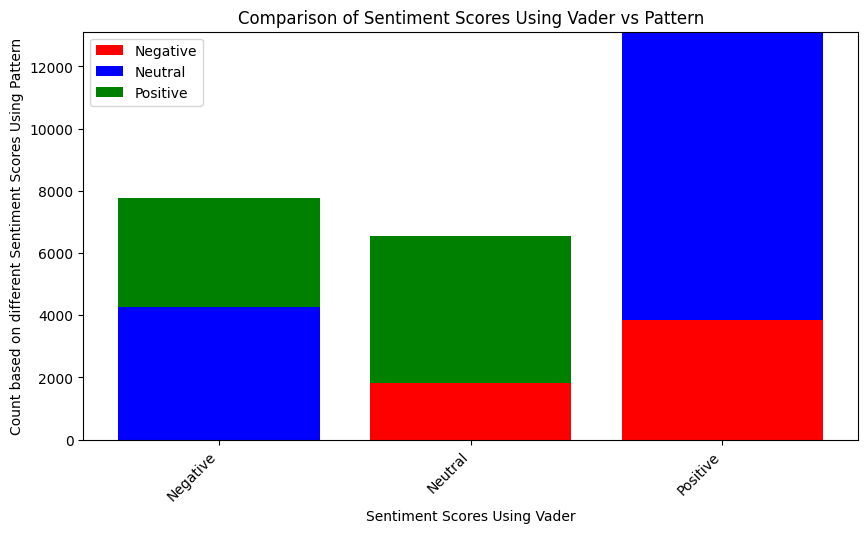

In [31]:
# Distribution of tweets over the days
pivoted_df_not_matching_sentiments = pd.pivot_table(df_not_matching_sentiments[["Sentiment", "Sentiment_Pattern_Score"]], index='Sentiment', columns='Sentiment_Pattern_Score', aggfunc=len, fill_value=0)
pivoted_df_not_matching_sentiments.head(10)
# create bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(pivoted_df_not_matching_sentiments.index.values, pivoted_df_not_matching_sentiments['Negative'], color='Red', label='Negative')
ax.bar(pivoted_df_not_matching_sentiments.index.values, pivoted_df_not_matching_sentiments['Neutral'], bottom=pivoted_df_not_matching_sentiments['Negative'], color='blue', label='Neutral')
ax.bar(pivoted_df_not_matching_sentiments.index.values, pivoted_df_not_matching_sentiments['Positive'], bottom=pivoted_df_not_matching_sentiments['Neutral']+pivoted_df_not_matching_sentiments['Negative'], color='green', label='Positive')

# set axis labels and title
ax.set_xlabel('Sentiment Scores Using Vader')
ax.set_ylabel('Count based on different Sentiment Scores Using Pattern')
ax.set_title('Comparison of Sentiment Scores Using Vader vs Pattern')

# rotate x-axis labels if needed
fig.autofmt_xdate(rotation=45)

# add legend
ax.legend(loc='upper left')

# show the plot
plt.show()

In [32]:
pivoted_df_not_matching_sentiments.head(10)

Sentiment_Pattern_Score,Negative,Neutral,Positive
Sentiment,,,
Negative,0,4264,3500
Neutral,1805,0,4732
Positive,3857,9259,0


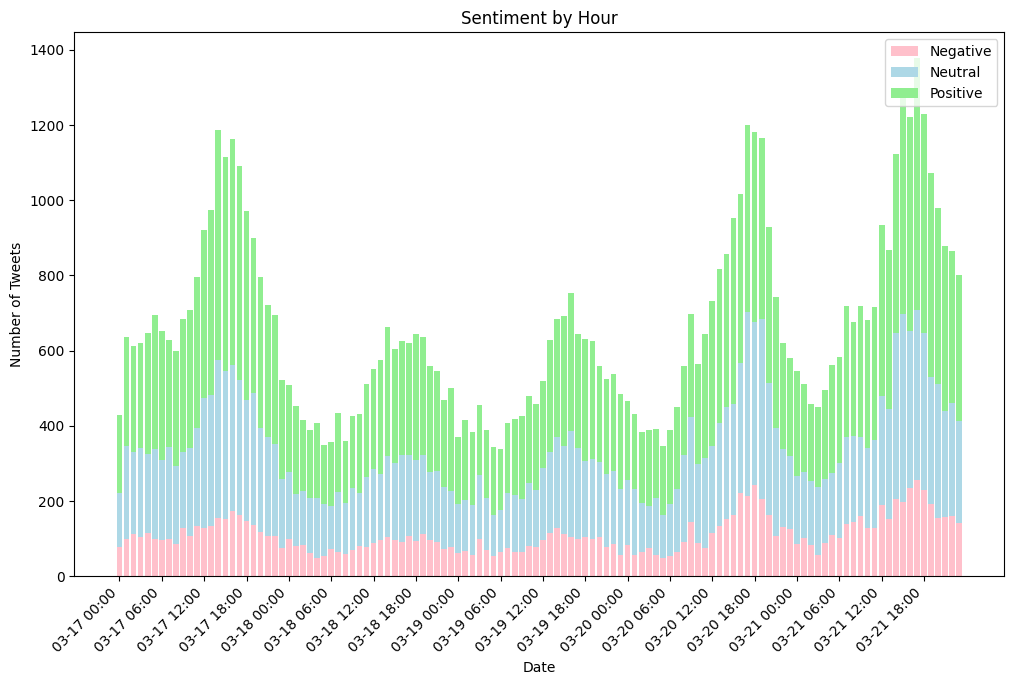

In [33]:
# Sentiment by Hour
final_df["OnlyDateHour"] = final_df["OnlyDate"].astype(str).str.split("-").str[-2] + "-" + final_df["OnlyDate"].astype(str).str.split("-").str[-1] + " " + final_df["Hour"].astype(str).str.rjust(2, '0') + ":00"

#final_df["OnlyDateHour"] = final_df["OnlyDate"].astype(str).str.split("-").str[-2]

#df1 = final_df[(final_df.OnlyDate == "2023-03-17")]
pivoted_df = pd.pivot_table(final_df[["OnlyDateHour", "Sentiment"]], index='OnlyDateHour', columns='Sentiment', aggfunc=len, fill_value=0)

# create bar chart
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(pivoted_df.index.values, pivoted_df['Negative'], color='pink', label='Negative')
ax.bar(pivoted_df.index.values, pivoted_df['Neutral'], bottom=pivoted_df['Negative'], color='lightblue', label='Neutral')
ax.bar(pivoted_df.index.values, pivoted_df['Positive'], bottom=pivoted_df['Neutral']+pivoted_df['Negative'], color='lightgreen', label='Positive')

# set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.set_title('Sentiment by Hour')

# rotate x-axis labels if needed
fig.autofmt_xdate(rotation=45)

# add legend
ax.legend(loc='upper right')
plt.xticks(np.arange(0, 120, step=6))
# show the plot
plt.show()

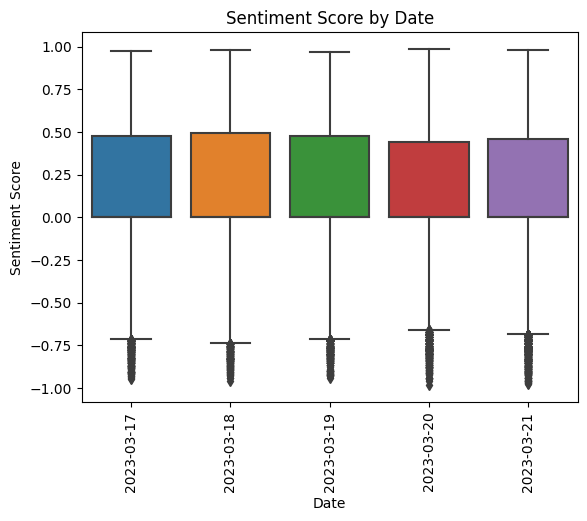

In [34]:
import seaborn as sns
#create seaborn boxplots for sentiment by Date
sns.boxplot(x='OnlyDate', y='Polarity_Score',
            data=final_df, order=['2023-03-17','2023-03-18','2023-03-19','2023-03-20','2023-03-21']).set(title='Sentiment Score by Date')
#modify axis labels
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)
plt.show()